# Submission Information:

### Team Member 1:
* UNI: gc2708 
* Name: GwonJae Cho

### Team Member 2 [optional]:
* UNI:  
* Name:

# Step0 - Import Libraries, Load Data [0 points]

This is the basic step where you can load the data and create train and test sets for internal validation as per your convinience.

In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.kernel_approximation import RBFSampler


df = pd.read_csv("data/data.csv")
df.head()
df = df[:5000]

,age,job,marital_status,education,credit_default,housing,loan,contact,month,day_of_week,...,campaign,prev_days,prev_contacts,prev_outcomes,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,41.0,blue-collar,married,basic.9y,no,yes,no,cellular,apr,mon,...,2.0,999,0,nonexistent,-1.695118,92.698705,-46.727552,1.345160,5097.0,no
1,46.0,entrepreneur,married,unknown,no,no,no,cellular,may,wed,...,2.0,999,0,nonexistent,-1.767159,92.914878,-46.313088,1.314499,5100.0,no
2,56.0,unemployed,married,basic.9y,no,yes,yes,cellular,nov,fri,...,1.0,999,0,nonexistent,-0.100365,93.423076,-41.904559,4.003471,5193.0,no
3,89.0,retired,divorced,basic.4y,no,yes,no,cellular,may,wed,...,4.0,999,0,nonexistent,-1.771314,93.672814,-46.045500,1.261668,5100.0,no
4,34.0,entrepreneur,married,university.degree,unknown,yes,no,cellular,jul,thu,...,8.0,999,0,nonexistent,1.458103,94.296285,-42.455877,5.152077,5233.0,no


In [2]:
holdout = pd.read_csv("data/holdout.csv")
holdout=holdout[:500]

ID = holdout.ID
holdout = holdout.drop("ID", axis=1)
holdout = holdout.drop("duration", axis=1)
holdout_ = pd.get_dummies(holdout, columns=['job', 'marital_status','education', 'credit_default', 'housing','loan', 
                                            'contact', 'month','day_of_week','prev_outcomes'])

# Step1 - Exploration and Preparation [10 points]

In this step, we expect you to look into the data and try to understand it before modeling. This understanding may lead to some basic data preparation steps which are common across the two model sets required.

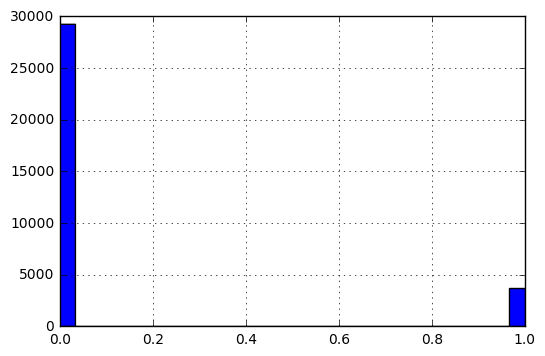

In [3]:
subscribed = df.subscribed
yes_no_map = {"yes":1, "no":0}
subscribed = subscribed.map(yes_no_map)
data = df.drop("subscribed", axis=1)
data = data.drop("duration", axis=1)

data_ = pd.get_dummies(data, columns=['job', 'marital_status','education', 'credit_default', 'housing','loan', 'contact', 'month','day_of_week','prev_outcomes'])

# %matplotlib inline
# subscribed.hist(bins=30)

# Step2 - ModelSet1 [35 points]

In this step, we expect you to perform the following steps relevant to the models you choose for set1:

* feature engineering
* validation
* feature selection
* final model selection

You may select up to 5 models in this step for the purpose of final ensemble. Any classification algorithm covered in class apart from tree-based models can be tested here.

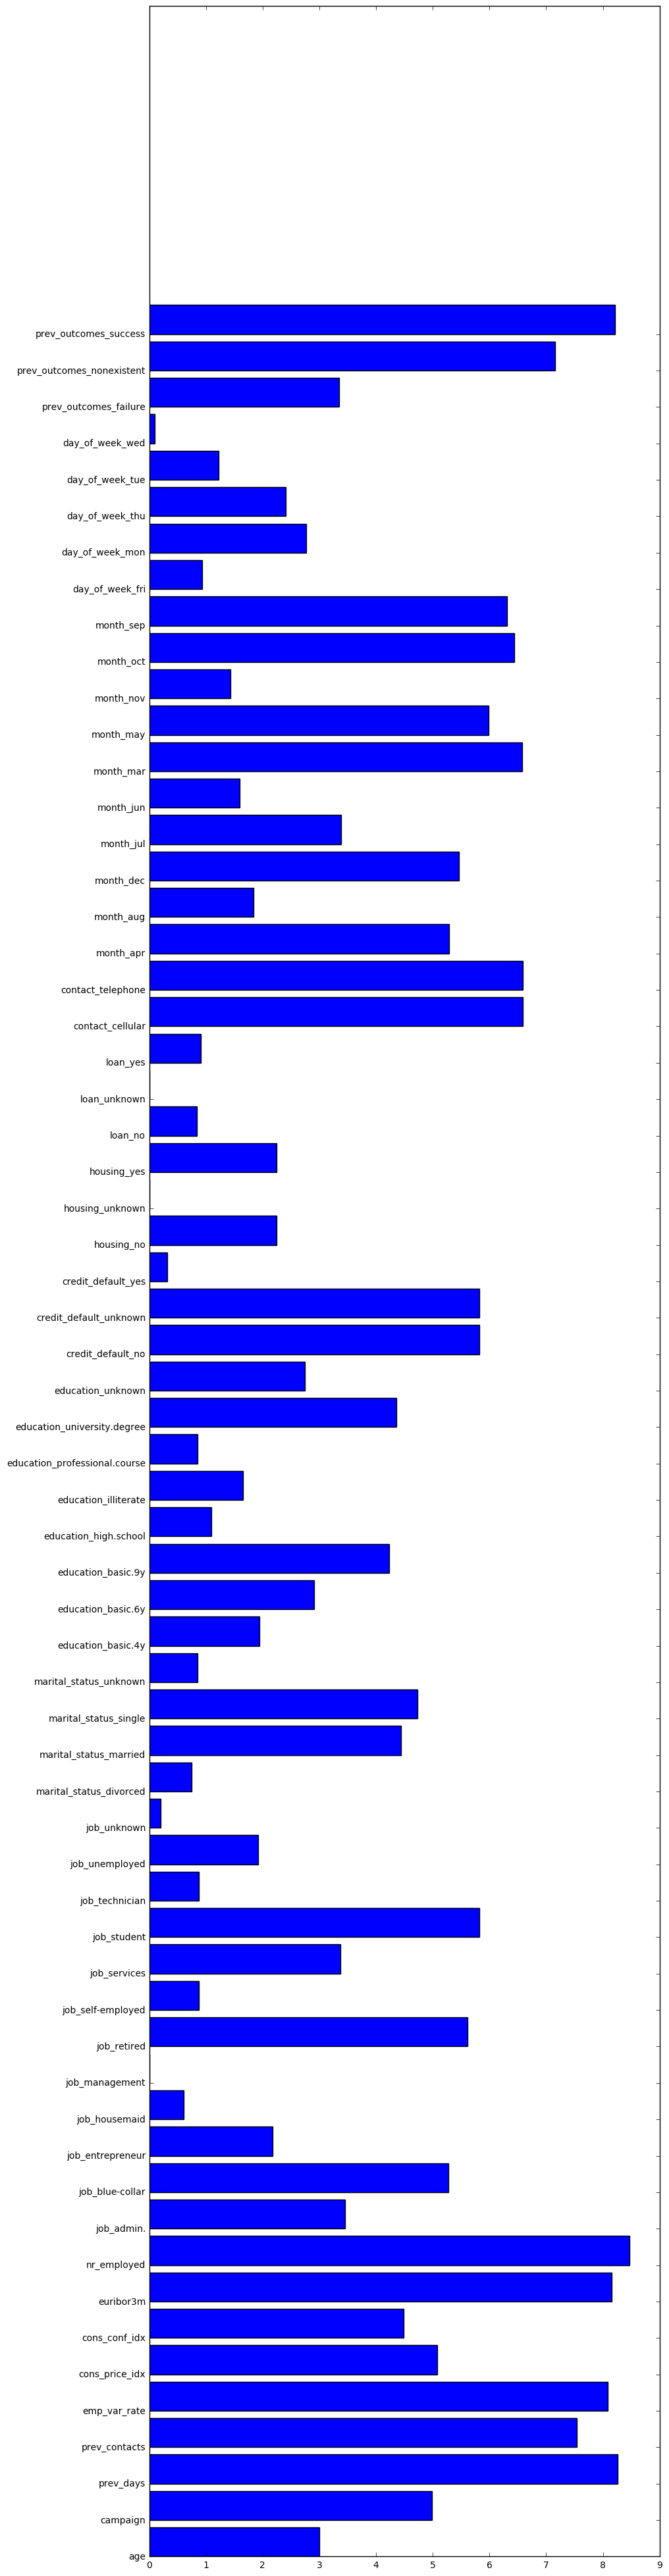

In [4]:
# F, p = f_regression(data_, subscribed)
# plt.figure(figsize=(10, 50))
# plt.barh(np.arange(len(F)), np.log(F + 1))
# plt.yticks(np.arange(len(F)), data_.columns);

/home/steve/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


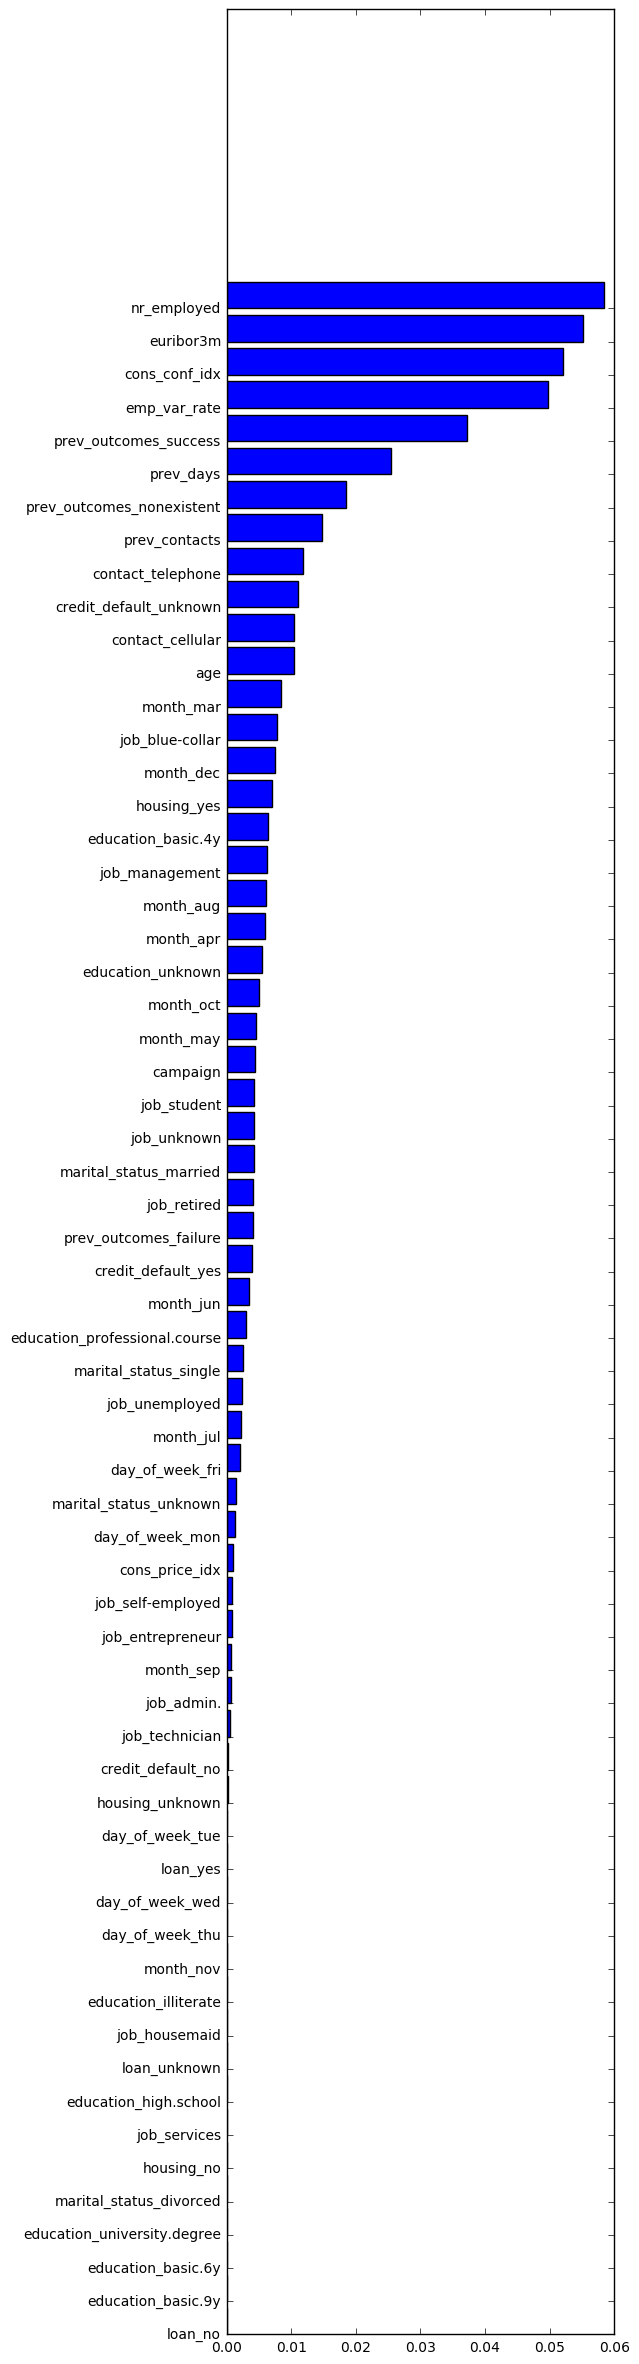

In [5]:
# mi = mutual_info_regression(data_.values, subscribed.values)

# inds = np.argsort(mi)
# plt.figure(figsize=(5, 30))
# plt.barh(np.arange(len(mi)), np.log(mi[inds] + 1))
# plt.yticks(np.arange(len(mi)), data_.columns[inds]);
# plt.show()

In [6]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(mutual_info_regression, percentile=60)
select.fit(data_, subscribed.values)
X_selected = select.transform(data_)
y = subscribed.values
print(X_selected.shape)
print(y.shape)

(32950, 37)
(32950,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, random_state=0)

# pipe = make_pipeline(StandardScaler(),KNeighborsClassifier())
# tuned_parameters = {'kneighborsclassifier__n_neighbors': [5,10]}
# knn_clf = GridSearchCV(pipe, param_grid = tuned_parameters)
# print(roc_auc_score(y_test,knn_clf.fit(X_train,y_train).predict_proba(X_test)[:,1]))
# assert(roc_auc_score(y_test,knn_clf.fit(X_train,y_train).predict_proba(X_test)[:,1]) > 0.7)

0.726634201684


In [ ]:
# fp,tp, threshold =roc_curve(y_test, knn_clf.predict_proba(X_test)[:,1])
# close_zero = np.argmin(np.abs(threshold))

# plt.plot(fp[close_zero],tp[close_zero],'o', fillstyle="none", markersize=10, label="threshold")
# plt.plot(fp, tp, label='roc_curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.ylim([0,1.1])
# plt.xlim([0,1.1])
# plt.show()

In [ ]:
lr_pipe = make_pipeline(StandardScaler(),PolynomialFeatures(interaction_only=True),LogisticRegressionCV(cv=5))
print(roc_auc_score(y_test,lr_pipe.fit(X_train,y_train).predict_proba(X_test)[:,1]))
assert(roc_auc_score(y_test,lr_pipe.fit(X_train,y_train).predict_proba(X_test)[:,1]) > 0.7)

In [ ]:
# fp,tp, threshold =roc_curve(y_test, lr_pipe.predict_proba(X_test)[:,1])
# close_zero = np.argmin(np.abs(threshold))

# plt.plot(fp[close_zero],tp[close_zero],'o', fillstyle="none", markersize=10, label="threshold")
# plt.plot(fp, tp, label='roc_curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.ylim([0,1.1])
# plt.xlim([0,1.1])
# plt.show()

In [ ]:
# tuned_parameters = {'svc__kernel': ['rbf'], 'svc__gamma': [1e-3, 1e-4],
#                      'svc__C': [1, 10]}
# pipe = make_pipeline(StandardScaler(),SVC(probability=True))
# svcclf = GridSearchCV(pipe, param_grid = tuned_parameters)
# print(roc_auc_score(y_test,svcclf.fit(X_train,y_train).predict_proba(X_test)[:,1]))
# assert(roc_auc_score(y_test,svcclf.fit(X_train,y_train).predict_proba(X_test)[:,1]) > 0.65)

In [ ]:
# fp,tp, threshold =roc_curve(y_test, svcclf.predict_proba(X_test)[:,1])
# close_zero = np.argmin(np.abs(threshold))

# plt.plot(fp[close_zero],tp[close_zero],'o', fillstyle="none", markersize=10, label="threshold")
# plt.plot(fp, tp, label='roc_curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.ylim([0,1.1])
# plt.xlim([0,1.1])
# plt.show()

In [ ]:
tuned_parameters = {'mlpclassifier__alpha': 10.0 ** -np.arange(1, 6)}
pipe = make_pipeline(StandardScaler(),MLPClassifier(max_iter=300))
mlpclf = GridSearchCV(pipe, param_grid = tuned_parameters)
print(roc_auc_score(y_test,mlpclf.fit(X_train,y_train).predict_proba(X_test)[:,1]))
assert(roc_auc_score(y_test,mlpclf.fit(X_train,y_train).predict_proba(X_test)[:,1]) > 0.7)

In [ ]:
# fp,tp, threshold =roc_curve(y_test, mlpclf.predict_proba(X_test)[:,1])
# close_zero = np.argmin(np.abs(threshold))

# plt.plot(fp[close_zero],tp[close_zero],'o', fillstyle="none", markersize=10, label="threshold")
# plt.plot(fp, tp, label='roc_curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.ylim([0,1.1])
# plt.xlim([0,1.1])
# plt.show()

In [ ]:
gnbpipe = make_pipeline(StandardScaler(),GaussianNB())
print(roc_auc_score(y_test,gnbpipe.fit(X_train,y_train).predict_proba(X_test)[:,1]))
assert(roc_auc_score(y_test,gnbpipe.fit(X_train,y_train).predict_proba(X_test)[:,1]) > 0.7)

# Step3 - ModelSet2 [35 points]

In this step, we expect you to perform the following steps relevant to the models you choose for set2:

* feature engineering
* validation
* feature selection
* final model selection

You may select up to 5 models in this step for the purpose of final ensemble. We encourage you to try decition tree, random forest and gradient boosted tree methods here and pick the one which you think works best.

In [ ]:
# tuned_parameters = {'min_samples_split': range(2,200,5)}
# dtclf = GridSearchCV(DecisionTreeClassifier(), param_grid = tuned_parameters)
# print(roc_auc_score(y_test,dtclf.fit(X_train,y_train).predict_proba(X_test)[:,1]))
# assert(roc_auc_score(y_test,dtclf.fit(X_train,y_train).predict_proba(X_test)[:,1]) > 0.7)

In [ ]:
# fp,tp, threshold =roc_curve(y_test, dtclf.predict_proba(X_test)[:,1])
# close_zero = np.argmin(np.abs(threshold))

# plt.plot(fp[close_zero],tp[close_zero],'o', fillstyle="none", markersize=10, label="threshold")
# plt.plot(fp, tp, label='roc_curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.ylim([0,1.1])
# plt.xlim([0,1.1])
# plt.show()

In [ ]:
tuned_parameters = {'n_estimators' : [50,100,150],'min_samples_split': range(2,100,10)}
rf_clf = GridSearchCV(RandomForestClassifier(max_features=int(np.sqrt(X_train.shape[1]))), 
                      param_grid = tuned_parameters, cv=5)
print(roc_auc_score(y_test,rf_clf.fit(X_train,y_train).predict_proba(X_test)[:,1]))
assert(roc_auc_score(y_test,rf_clf.fit(X_train,y_train).predict_proba(X_test)[:,1]) > 0.7)

In [ ]:
# tuned_parameters = {'n_estimators':[50,100,150],'min_samples_split': range(2,100,5)}
# et_clf = GridSearchCV(ExtraTreesClassifier(max_features=int(np.sqrt(X_train.shape[1]))), 
#                       param_grid = tuned_parameters)
# print(roc_auc_score(y_test,et_clf.fit(X_train,y_train).predict_proba(X_test)[:,1]))
# assert(roc_auc_score(y_test,et_clf.fit(X_train,y_train).predict_proba(X_test)[:,1]) > 0.7)

In [ ]:
# fp,tp, threshold =roc_curve(y_test, et_clf.predict_proba(X_test)[:,1])
# close_zero = np.argmin(np.abs(threshold))

# plt.plot(fp[close_zero],tp[close_zero],'o', fillstyle="none", markersize=10, label="threshold")
# plt.plot(fp, tp, label='roc_curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.ylim([0,1.1])
# plt.xlim([0,1.1])
# plt.show()

In [ ]:
# tuned_parameters = {'n_estimators':[50,100,150],'min_samples_split': range(2,100,5), 
#                     'learning_rate':10.0 ** -np.arange(1, 3)}
# gb_clf = GridSearchCV(GradientBoostingClassifier(), param_grid = tuned_parameters)
# print(roc_auc_score(y_test,gb_clf.fit(X_train,y_train).predict_proba(X_test)[:,1]))
# assert(roc_auc_score(y_test,gb_clf.fit(X_train,y_train).predict_proba(X_test)[:,1]) > 0.7)

# Step4 - Ensemble [20 points + 10 Bonus points]

In this step, we expect you to use the models created before and create new predictions. You should definitely try poor man's stacking but we encourage you to think of different ensemble techniques as well. We will judge your creativity and improvement in model performance using ensemble models and you can potentially earn 10 bonus points here.

In [ ]:
# voting = VotingClassifier([('lr',lr_pipe),('gnb',gnbpipe),('rf',rf_clf),voting='soft')
# print(roc_auc_score(y_test,voting.fit(X_train, y_train).predict_proba(X_test)[:,1]))
# assert(roc_auc_score(y_test,voting.fit(X_train, y_train).predict_proba(X_test)[:,1]) > 0.75)

In [ ]:
# from xgboost.sklearn import XGBClassifier

# cv_params = {'max_depth': [5,7,9], 'min_child_weight': [1,3]}
# ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
#              'objective': 'binary:logistic'}
# optimized_GBM = GridSearchCV(XGBClassifier(**ind_params), cv_params, scoring = 'roc_auc') 
# optimized_GBM.fit(X_train, y_train)

# print(optimized_GBM.grid_scores_)

In [ ]:
# cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
# ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
#              'objective': 'binary:logistic', 'max_depth': 9, 'min_child_weight': 1}


# optimized_GBM = GridSearchCV(XGBClassifier(**ind_params), 
#                             cv_params, 
#                              scoring = 'roc_auc')

# print(roc_auc_score(y_test,optimized_GBM.fit(X_train,y_train).predict_proba(X_test)[:,1]))
# assert(roc_auc_score(y_test,optimized_GBM.fit(X_train, y_train).predict_proba(X_test)[:,1]) > 0.75)